In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sep = "\t"

In [57]:
df = pd.read_csv('assignment3.txt', sep=",", names=["Feature 1", "Feature 2", "Class"], header=None)
df['Feature 1'] = pd.to_numeric(df['Feature 1'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  730 non-null    float64
 1   Feature 2  730 non-null    float64
 2   Class      730 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 17.2 KB


In [58]:
df.head()

,Feature 1,Feature 2,Class
0,-0.99,-0.50,1
1,-0.65,0.50,1
2,0.16,-0.67,1
3,0.72,-0.43,1
4,0.05,-0.83,1


## Splitting dataset into train/test

In [59]:
#splitting the dataset into test/train datasets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
#train_set = train_set[~np.isnan(train_set_0)]

In [60]:
#prepare the model for machine learning algorithm
X_train = train_set.drop("Class", axis=1)
y_train = train_set["Class"].copy()
X_test = test_set.drop("Class", axis=1)
y_test = test_set["Class"].copy()

In [62]:
X1 = X_train['Feature 1']
#X99 = X1[~np.isnan(X1)]
X2 = X_train['Feature 2']
#X98 = X2[~np.isnan(X2)]
X_num = np.column_stack((X1,X2))
y_num = np.array(y_train)

X3 = X_test['Feature 1']
X4 = X_test['Feature 2']
X_num_test = np.column_stack((X3,X4))
y_num_test = np.array(y_test)

print(len(X_num))
print(len(y_num))
print(len(X_num_test))
print(len(y_num_test))

584
584
146
146


## Using cross validation to select the max polynomial order number

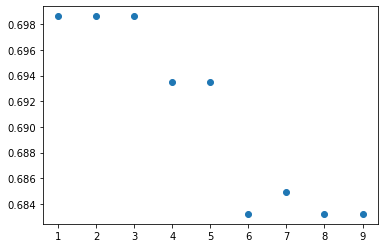

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def create_polynomial_regression_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly = LogisticRegression()
    return np.mean(cross_val_score(poly, X_poly, y, cv=5, scoring='accuracy'))

poly_cv = []

for i in range(1,10):
    poly_cv.append(create_polynomial_regression_model(i, X_num, y_num))

plt.scatter(range(1,10),poly_cv)

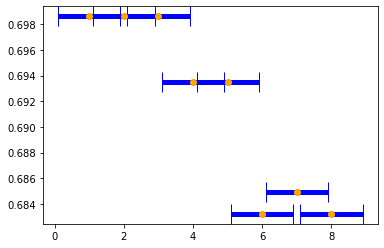

In [64]:
plt.errorbar(range(1,9), poly_cv[:8], xerr = 0.9, fmt = 'o',color = 'orange', 
            ecolor = 'blue', elinewidth = 5, capsize=10)

plt.show()

## Using cross validation to select a value for the parameter C

### Study the logistic regression coefficients for various models in order to determine a range of optimal C values

In [ ]:
# the polynomial value 3 seems to strike the best balance between over/under fitting => train the ridge classifier with that

In [65]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_num)
X_poly_test = poly_features.fit_transform(X_num_test)

In [66]:
from sklearn.linear_model import RidgeClassifier

ridge_1 = RidgeClassifier(alpha=1)
ridge_1.fit(X_poly, y_train)
ridge_1.coef_

array([[ 0.        ,  0.12834889, -0.07024377, -0.13378166,  0.00469883,
        -0.07329929, -0.13194001,  0.16661711,  0.02821129, -0.00731412]])

In [67]:
ridge_2 = RidgeClassifier(alpha=0.5)
ridge_2.fit(X_poly, y_train)
ridge_2.coef_

array([[ 0.        ,  0.13296728, -0.07260567, -0.13491466,  0.00461005,
        -0.07403053, -0.13900586,  0.17198956,  0.02851912, -0.00650921]])

In [68]:
ridge_3 = RidgeClassifier(alpha=0.05)
ridge_3.fit(X_poly, y_train)
ridge_3.coef_

array([[ 0.        ,  0.13752477, -0.07489222, -0.13594329,  0.00452662,
        -0.0746961 , -0.14596523,  0.1771267 ,  0.02876718, -0.00569503]])

In [69]:
ridge_4 = RidgeClassifier(alpha=0.005)
ridge_4.fit(X_poly, y_train)
ridge_4.coef_

array([[ 0.        ,  0.13800359, -0.07512987, -0.13604659,  0.00451808,
        -0.07476303, -0.14669559,  0.17765716,  0.02879004, -0.00560852]])

In [70]:
ridge_5 = RidgeClassifier(alpha=0.0005)
ridge_5.fit(X_poly, y_train)
ridge_5.coef_

array([[ 0.        ,  0.13805172, -0.07515373, -0.13605692,  0.00451723,
        -0.07476972, -0.14676899,  0.17771038,  0.02879231, -0.00559982]])

In [71]:
from sklearn.metrics import accuracy_score

def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        test_errors.append(accuracy_score(y_test, y_test_predict))
        
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)  
        

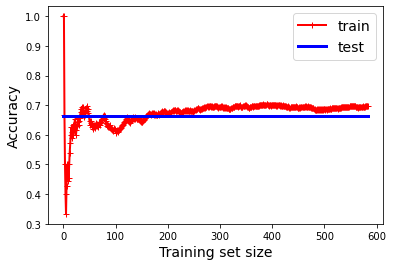

In [72]:
plot_learning_curves(ridge_1, X_poly, y_num, X_poly_test, y_num_test)

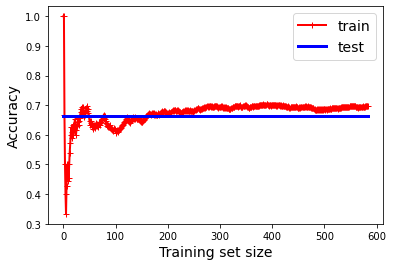

In [73]:
plot_learning_curves(ridge_2, X_poly, y_num, X_poly_test, y_num_test)

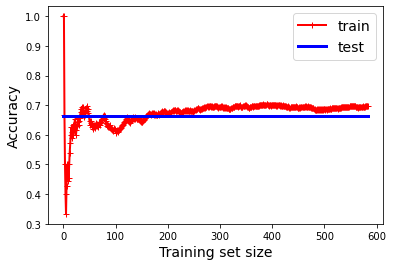

In [74]:
plot_learning_curves(ridge_3, X_poly, y_num, X_poly_test, y_num_test)

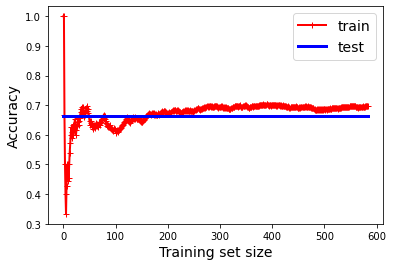

In [75]:
plot_learning_curves(ridge_4, X_poly, y_num, X_poly_test, y_num_test)

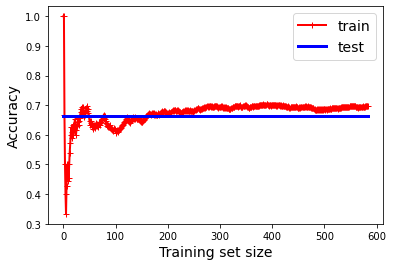

In [76]:
plot_learning_curves(ridge_5, X_poly, y_num, X_poly_test, y_num_test)

In [77]:
y_pred_train = ridge_1.predict(X_poly)
acc = accuracy_score(y_pred_train, y_num)
print(round(acc*100, 2), "%", sep="")

y_pred_test = ridge_1.predict(X_poly_test)
acc = accuracy_score(y_pred_test, y_num_test)
print(round(acc*100, 2), "%", sep="")

69.86%
66.44%


In [78]:
y_pred_train = ridge_2.predict(X_poly)
acc = accuracy_score(y_pred_train, y_num)
print(round(acc*100, 2), "%", sep="")

y_pred_test = ridge_1.predict(X_poly_test)
acc = accuracy_score(y_pred_test, y_num_test)
print(round(acc*100, 2), "%", sep="")

69.86%
66.44%


In [79]:
y_pred_train = ridge_3.predict(X_poly)
acc = accuracy_score(y_pred_train, y_num)
print(round(acc*100, 2), "%", sep="")

y_pred_test = ridge_1.predict(X_poly_test)
acc = accuracy_score(y_pred_test, y_num_test)
print(round(acc*100, 2), "%", sep="")

69.86%
66.44%


In [80]:
y_pred_train = ridge_4.predict(X_poly)
acc = accuracy_score(y_pred_train, y_num)
print(round(acc*100, 2), "%", sep="")

y_pred_test = ridge_1.predict(X_poly_test)
acc = accuracy_score(y_pred_test, y_num_test)
print(round(acc*100, 2), "%", sep="")

69.86%
66.44%


In [81]:
y_pred_train = ridge_5.predict(X_poly)
acc = accuracy_score(y_pred_train, y_num)
print(round(acc*100, 2), "%", sep="")

y_pred_test = ridge_1.predict(X_poly_test)
acc = accuracy_score(y_pred_test, y_num_test)
print(round(acc*100, 2), "%", sep="")

69.86%
66.44%


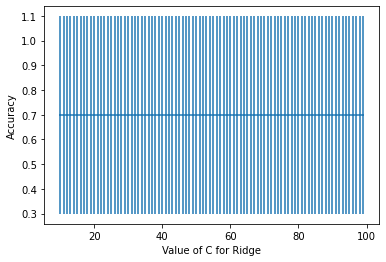

In [117]:
# search for an optimal value for C
from sklearn.model_selection import cross_val_score
C_range = range(10, 100)
C_scores = []
for C in C_range:
    ridge = RidgeClassifier(alpha=1/(2*C))
    scores = cross_val_score(ridge, X_num, y_num, cv=5, scoring='accuracy')
    C_scores.append(scores.mean())

    
plt.errorbar(C_range, C_scores, xerr=0.2, yerr=0.4)
plt.xlabel('Value of C for Ridge')
plt.ylabel('Accuracy')
plt.show()


#no real influence of the C parameter over the prediction results

## Train a kNN classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

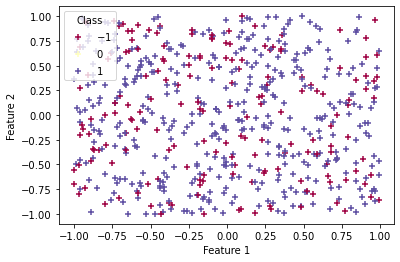

In [109]:
#presenting the data on a 2d graph




fig, ax = plt.subplots()
y_pred = model.predict(X_test)
scatter = ax.scatter(X_train['Feature 1'], X_train['Feature 2'], c=y_train, cmap="Spectral", marker='+')

legend1 = ax.legend(*scatter.legend_elements(num=2),
                    loc="upper left", title="Class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [86]:
y_pred_train = model.predict(X_train)

def repack_results2(train_size=1, ok_size=10, ko_size=50):
    traindata = pd.DataFrame(X_train, columns=["Feature 1", "Feature 2"])
    traindata["Class"] = y_train
    traindata["Match"] = [ok_size if x == y else ko_size for x,y in zip(y_train, y_pred_train)]
    return traindata.sort_values(by="Class", ascending=False)

res_train = repack_results2()

In [87]:
res_train.head()
print(res_train["Match"].value_counts())

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_train, y_pred_train)
print(round(acc*100, 2), "%", sep="")

10    465
50    119
Name: Match, dtype: int64
79.62%


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


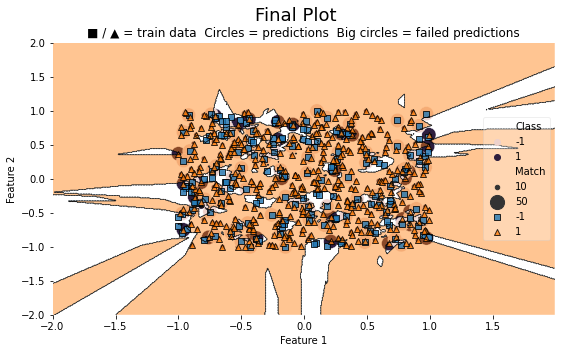

In [88]:
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

suptitle = "Final Plot"
def plot_results():
    fig = plt.figure(figsize=(9,5))
    fig.suptitle(suptitle, size=18)
    ax = sns.scatterplot(data=res_train, x="Feature 1", y="Feature 2", hue="Class", size="Match", sizes=(20,200))
    ax.set_title("■ / ▲ = train data  Circles = predictions  Big circles = failed predictions")

    plot_decision_regions(X_num, y_num.astype(int), clf=model, legend=5)
    
plot_results()

In [89]:
model_2 = KNeighborsClassifier(n_neighbors=7, weights='uniform')
model_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [90]:
y_pred_train = model_2.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(round(acc*100, 2), "%", sep="")

71.4%


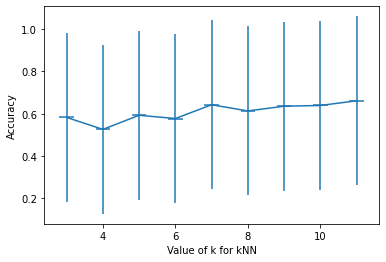

In [92]:
k_range = range(3, 12)
k_scores = []
k_alternative = []
for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    scores = cross_val_score(kNN, X_num, y_num, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.errorbar(k_range, k_scores, xerr=0.2, yerr=0.4)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')
plt.show()

In [93]:
model_3 = KNeighborsClassifier(n_neighbors=7, weights='uniform')
model_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [94]:
y_pred_train = model_3.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(round(acc*100, 2), "%", sep="")

71.4%


## Calculate confusion matrices for the trained models

In [119]:
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

class Binary_Classification:
    def __init__(self, 
                 x_train, 
                 y_train,
                 x_test,
                 y_test,
                 scoring = None): 
        
        self.x_train = x_train # features as df
        self.y_train = y_train # target as df
        self.x_test = x_test
        self.y_test = y_test
        self.scoring = scoring # example: "accuracy", "f1", "roc_auc"
    
    def examine_model(self, model_name):
        
        def model_and_grid(model_name):
            if model_name == "log_reg":
                model = RidgeClassifier()
                grid = {'alpha' : [0.001, 0.1, 1, 10, 100]}
                return model, grid

            elif model_name == "knn":
                model = KNeighborsClassifier()
                grid = {"n_neighbors" : [3,6,9,12]}
                return model, grid
       
                return model, grid
        
        def best_model(model, grid):
            gs = GridSearchCV(model, param_grid=grid, cv=5, scoring=self.scoring)
            gs.fit(self.x_train, self.y_train)
            print("CV " + self.scoring.upper() + " SCORE:", round(gs.best_score_, 2))
            print("CV PARAMS: ", gs.best_params_)
            #print("BEST MODEL: ", gs.best_estimator_)
            best_model = gs.best_estimator_
            return best_model

        model, grid = model_and_grid(model_name)
        best_mod = best_model(model, grid)
        return best_mod

    def test_scores(self, 
                    model_name = None):
        
        print(model_name)
        if model_name != "dummy": 
            model = self.examine_model(model_name)
        else:
            model = DummyClassifier(strategy="most_frequent")
            model.fit(self.x_train, self.y_train)
        
        y_pred_train = model.predict(self.x_train)
        y_pred_test = model.predict(self.x_test)
        
        print()
        
        """ Accuracy """
        if self.scoring == "accuracy":
            accuracy_training = model.score(self.x_train, self.y_train)
            tru_count_train = Counter(self.y_train)[True]
            fal_count_train = Counter(self.y_train)[False]

            accuracy_test = model.score(self.x_test, self.y_test)
            tru_count_test = Counter(self.y_test)[True]
            fal_count_test = Counter(self.y_test)[False]

            print("Accuracy on test data: {:0.2f}".format(accuracy_test))
            print()

        """ F1 (f-one) Score """
        ## F1 Score = 2*((precision*recall)/(precision+recall))
        if self.scoring == "f1":
            f1_train = metrics.f1_score(self.y_train, y_pred_train)
#             print("F1 on training data:{:0.2f}".format(f1_train))

            f1_test = metrics.f1_score(self.y_test, y_pred_test)
            print("F1 on test data: {:0.2f}".format(f1_test))
            print()

        """ Classification Report """
        ## Precision = TP / TP + FP
        ## Recall = TP/ TP + FN
        class_repo = classification_report(self.y_test,y_pred_test)
        print("Classification Report on test data:\n", class_repo)
            
        """ Confusion matrix """
        def print_confusion_matrix(confusion_matrix, 
                           class_names,
                           #figsize = (2,2), fontsize=20
                          ):

            df_cm = pd.DataFrame(
                confusion_matrix, 
                index=class_names, 
                columns=class_names, 
            )

            fig = plt.figure(#figsize=figsize
            )

            try:
                heatmap = sns.heatmap(df_cm, 
                                      annot=True, 
                                      fmt="d", 
                                      cbar=False, 
                                      cmap="YlGnBu")
            except ValueError:
                raise ValueError("Confusion matrix values must be integers.")

                heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), 
                                             rotation=0, 
                                             ha='right', 
                                             #fontsize=fontsize
                                            )

                heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), 
                                             rotation=45, 
                                             ha='right', 
                                             #fontsize=fontsize
                                            )

            plt.title('Test Confusion Matrix')
            plt.ylabel('Correct label')
            plt.xlabel('Predicted label')
            
        c_matrix = confusion_matrix(self.y_test, y_pred_test)
        print_confusion_matrix(c_matrix, [False, True])

In [120]:
print(len(X_train))
models = Binary_Classification(X_train, 
                               y_train,
                               X_test,
                               y_test,
                               "accuracy")
                     

584


In [121]:
print(len(models.x_train))
print(len(models.y_train))
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.dummy import DummyClassifier

584
584


log_reg
am ajuns aic
CV ACCURACY SCORE: 0.7
CV PARAMS:  {'alpha': 0.001}

Accuracy on test data: 0.66

Classification Report on test data:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        49
           1       0.66      1.00      0.80        97

    accuracy                           0.66       146
   macro avg       0.33      0.50      0.40       146
weighted avg       0.44      0.66      0.53       146



C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


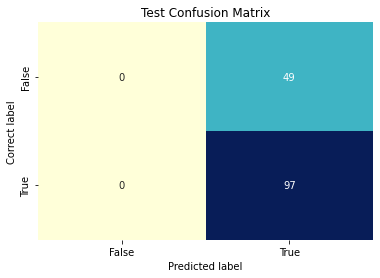

In [122]:
models.test_scores(model_name = "log_reg")

knn
CV ACCURACY SCORE: 0.66
CV PARAMS:  {'n_neighbors': 12}

Accuracy on test data: 0.64

Classification Report on test data:
               precision    recall  f1-score   support

          -1       0.44      0.22      0.30        49
           1       0.69      0.86      0.76        97

    accuracy                           0.64       146
   macro avg       0.56      0.54      0.53       146
weighted avg       0.60      0.64      0.61       146



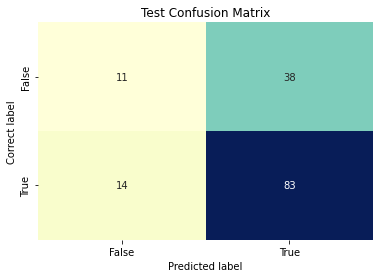

In [114]:
models.test_scores(model_name = "knn")

dummy

Accuracy on test data: 0.66

Classification Report on test data:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        49
           1       0.66      1.00      0.80        97

    accuracy                           0.66       146
   macro avg       0.33      0.50      0.40       146
weighted avg       0.44      0.66      0.53       146



C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\catat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


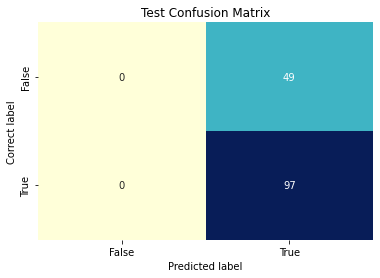

In [115]:
models.test_scores(model_name = "dummy")

## Plotting the ROC curve

In [106]:
from sklearn.metrics import roc_auc_score

ridge =  RidgeClassifier(alpha=10)
ridge.fit(X_train, y_train)
d = ridge.decision_function(X_test)
probs = np.exp(d) / (1 + np.exp(d))
print(probs.shape)


#compare probs score between kNN and ridge 
kNN = KNeighborsClassifier(n_neighbors=12)
kNN.fit(X_train, y_train)
kNN_probs = kNN.predict_proba(X_test)
print(kNN_probs.shape)
print(probs[:10])
print(kNN_probs[:10])

(146,)
(146, 2)
[0.59856331 0.58551855 0.59998331 0.60829269 0.59968342 0.59217776
 0.60232115 0.59036872 0.59875264 0.61156131]
[[0.33333333 0.66666667]
 [0.58333333 0.41666667]
 [0.33333333 0.66666667]
 [0.16666667 0.83333333]
 [0.41666667 0.58333333]
 [0.5        0.5       ]
 [0.16666667 0.83333333]
 [0.25       0.75      ]
 [0.33333333 0.66666667]
 [0.16666667 0.83333333]]


146
146
Dummy: ROC AUC=0.500
Logistic: ROC AUC=0.503
kNN: ROC AUC=0.517


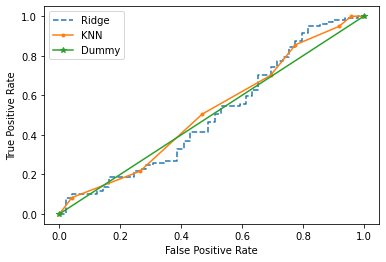

In [126]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# we can use most frequent since the positive samples are in bigger number
ridge =  RidgeClassifier(alpha=10)
kNN = KNeighborsClassifier(n_neighbors=12)
dummy = DummyClassifier(strategy="most_frequent")

ridge.fit(X_train, y_train)
kNN.fit(X_train, y_train)
dummy.fit(X_train, y_train)

# predict probabilities

ridge_d = ridge.decision_function(X_test)
ridge_probs = np.exp(ridge_d) / (1 + np.exp(ridge_d))
print(len(ridge_probs))
kNN_probs = kNN.predict_proba(X_test)
print(len(kNN_probs))
dummy_probs = dummy.predict_proba(X_test)

# keep probabilities for the positive outcome only

ridge_probs = ridge_probs
kNN_probs = kNN_probs[:, 1]
dummy_probs = dummy_probs[:, 1]

# calculate scores
ridge_auc = roc_auc_score(y_test, ridge_probs)
kNN_auc = roc_auc_score(y_test, kNN_probs)
dummy_auc = roc_auc_score(y_test, dummy_probs)

# summarize scores
print('Dummy: ROC AUC=%.3f' % (dummy_auc))
print('Logistic: ROC AUC=%.3f' % (ridge_auc))
print('kNN: ROC AUC=%.3f' % (kNN_auc))

# calculate roc curves
ridge_fpr, ridge_tpr, _ = roc_curve(y_test, ridge_probs)
kNN_fpr, kNN_tpr, _ = roc_curve(y_test, kNN_probs)
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_probs)

# plot the roc curve for the model
plt.plot(ridge_fpr, ridge_tpr, linestyle='--', label='Ridge')
plt.plot(kNN_fpr, kNN_tpr, marker='.', label='KNN')
plt.plot(dummy_fpr, dummy_tpr, marker='*', label='Dummy')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Compare the Permormance of the trained classifiers

In [55]:
# it looks like Ridge and kNN output similar performance levels, significantly better than the dummy classifier 